In [1]:
import numpy as np
from scipy.spatial import Delaunay#, ConvexHull
import matplotlib.pyplot as plt
from copy import copy, deepcopy

## Define a hull
Define the shape on the negative side of Y axis

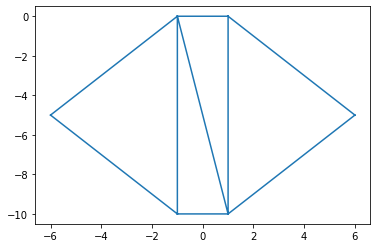

In [2]:
hull_bound_points = np.array([[6,-5],[-6,-5],[1,0],[-1,0], [1,-10],[-1,-10]])
hull_bound = Delaunay(hull_bound_points)
plt.triplot(hull_bound_points[:,0], hull_bound_points[:,1], hull_bound.simplices)
plt.show()

## Define points inside hull

The denser the point, the finer the meshing

In [3]:
mesh_points = [[-1,0],[1,0]]
for i in range(-6,6 + 1,1):
    for j in range(-10,0,1):
        mesh_points.append([i,j])
mesh_ini = np.array(mesh_points)

Check if point is inside

In [4]:
mesh = np.array([p_ for p_ in mesh_ini if hull_bound.find_simplex(p_)>=0])

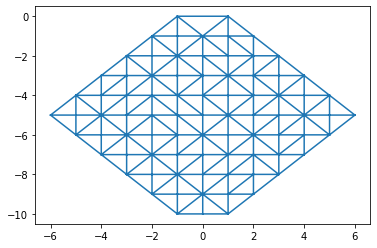

In [5]:
tri = Delaunay(mesh)
plt.triplot(mesh[:,0], mesh[:,1], tri.simplices)
plt.show()

Number of points

In [6]:
tri.points.shape[0]

82

Number of triangles

In [7]:
tri.simplices.shape[0]

139

## Mirror the shape

In [8]:
tri_mirrored = deepcopy(tri)
for i in range(tri.points.shape[0]):
    tri_mirrored.points[i] = tri.points[i]*np.array([1,-1])
#tri_mirrored.points

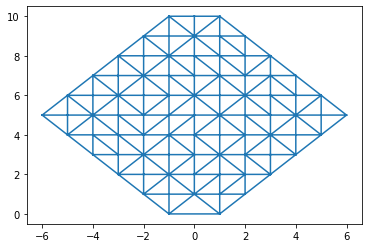

In [9]:
plt.triplot(tri_mirrored.points[:,0], tri_mirrored.points[:,1], tri.simplices)
plt.show()

In [10]:
len(tri_mirrored.points)

82

In [11]:
points_concat = np.concatenate((tri.points, tri_mirrored.points[2:]), axis=0)

In [12]:
for t in range(tri.simplices.shape[0]):
    for t_p in range(3):
        if tri.simplices[t,t_p] > 1:
            tri_mirrored.simplices[t,t_p] = tri.simplices[t,t_p] + tri.points.shape[0] - 2
#tri_mirrored.simplices

In [13]:
tri_concat = np.concatenate((tri.simplices, tri_mirrored.simplices), axis=0)
#tri_concat

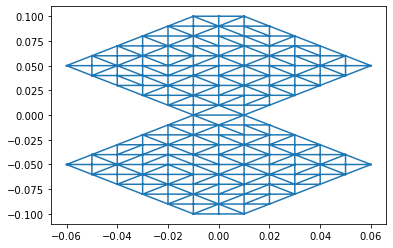

In [19]:
plt.triplot(points_concat[:,0]/100, points_concat[:,1]/100, tri_concat)
plt.show()

In [15]:
p = np.zeros((3,points_concat.shape[0]))
p[0:2,:] = points_concat.T
#p #same format as Matlab

In [16]:
t = np.ones((4,tri_concat.shape[0]))
t[0:3,:] = tri_concat.T
#t #same format as Matlab

In [17]:
points_concat.shape[0]

162

In [18]:
tri_concat.shape[0]

278